###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, C.D. Cooper, G.F. Forsyth.

# Spreading out

Welcome to the fifth, and last, notebook of Module 4 "_Spreading out: diffusion problems,"_ of our fabulous course **"Practical Numerical Methods with Python."**

In this course module, we have learned about explicit and implicit methods for parabolic equations in 1 and 2 dimensions. So far, all schemes have been first-order in time and second-order in space. _Can we do any better?_ We certainly can: this notebook presents the Crank-Nicolson scheme, which is a second-order method in both time and space! We will continue to use the heat equation to guide the discussion, as we've done throughout this module. 

## Crank-Nicolson scheme

The [Crank Nicolson scheme](http://en.wikipedia.org/wiki/Crank–Nicolson_method) is a popular second-order, implicit method used with parabolic PDEs in particular. It was developed by John Crank and [Phyllis Nicolson](http://en.wikipedia.org/wiki/Phyllis_Nicolson). The main idea is to take the average between the solutions at $t^n$ and $t^{n+1}$ in the evaluation of the spatial derivative. Why bother doing that? Because the time derivative will then be discretized with a centered scheme, giving second-order accuracy!

Remember the 1D heat equation from the [first notebook](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/01_Heat_Equation_1D_Explicit.ipynb)? Just to refresh your memory, here it is:

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2T}{\partial x^2}.
\end{equation}

In this case, the Crank-Nicolson scheme leads to the following discretized equation:

\begin{eqnarray}
\frac{T^{n+1}_i - T^n_i}{\Delta t} = & \nonumber \\
\alpha \cdot \frac{1}{2} &\left( 
\frac{T^{n+1}_{i+1} - 2T^{n+1}_i + T^{n+1}_{i-1}}{\Delta x^2} 
+ \frac{T^n_{i+1}-2T^n_i + T^n_{i-1}}{\Delta x^2}
\right)
\end{eqnarray}

Notice how the both time indices $n$ and $n+1$ appear on the right-hand side. You know we'll have to rearrange this equation, right? Now look at the stencil and notice that we are using more information than before in the update.

![stencil-cranknicolson](./figures/stencil-cranknicolson.png)

#### Figure 2. Stencil of the Crank-Nicolson scheme.

Rearraning terms so that everything that we don't know is on the left side and what we do know on the right side, we get

\begin{eqnarray} 
-T^{n+1}_{i-1} + 2\left(\frac{\Delta x^2}{\alpha\Delta t}+1\right)T^{n+1}_i - T^{n+1}_{i+1} = & \nonumber\\
T^{n}_{i-1} + & 2\left(\frac{\Delta x^2}{\alpha\Delta t}-1\right)T^{n}_i + T^{n}_{i+1}
\end{eqnarray}

Again, we are left with a linear system of equations. Check out the left side of that equation: it looks a lot like the matrix from [notebook 2](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/02_Heat_Equation_1D_Implicit.ipynb), doesn't it? Apart from the slight modification in the $T_i^{n+1}$ term, the left side of the equation is pretty much the same. What about the right-hand side? Sure, it looks quite different, but that is not a problem, we know all those terms!

Things don't change much for boundary conditions, either. We've seen all the cases already. Say $T_0^{n+1}$ is a Dirichlet boundary. Then the equation for $i=1$ becomes

\begin{eqnarray} 
 2\left(\frac{\Delta x^2}{\alpha\Delta t}+1\right)T^{n+1}_1 - T^{n+1}_{2} = & \nonumber\\ 
 T^{n}_{0} + & 2\left(\frac{\Delta x^2}{\alpha\Delta t}-1\right)T^{n}_1 + T^{n}_{2} + T^{n+1}_{0}
\end{eqnarray}

And if we have a Neumann boundary $\left(\left.\frac{\partial T}{\partial x}\right|_{x=L} = q\right)$ at $T_{n_x-1}^{n+1}$? We know this stuff, right? For $i=n_x-2$ we get

\begin{eqnarray} 
-T^{n+1}_{n_x-3} + \left(2\frac{\Delta x^2}{\alpha\Delta t}+1\right)T^{n+1}_{n_x-2} = & \nonumber\\
T^{n}_{n_x-3} + & 2\left(\frac{\Delta x^2}{\alpha\Delta t}-1\right)T^{n}_{n_x-2} + T^{n}_{n_x-1} + q\Delta x
\end{eqnarray}

The code will look a lot like the implicit method from the [second notebook](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/02_Heat_Equation_1D_Implicit.ipynb). Only some terms of the matrix and right-hand-side vector will be different, which changes some of our custom functions.

### The linear system

Just like in [notebook 2](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/02_Heat_Equation_1D_Implicit.ipynb), we need to solve a linear system on every time step of the form:

$$[A][T^{n+1}_\text{int}] = [b]+[b]_{b.c.}$$

The coefficient matrix is very similar to the previous case, but the right-hand side changes a lot:

\begin{align}\left[ \begin{array}{cccccc}
 2\left(\frac{1}{\sigma}+1\right) & -1 & 0 & \cdots & & 0 \\
 -1 & 2\left(\frac{1}{\sigma}+1\right) & -1 & 0 & \cdots & 0 \\
 0 & & \ddots& & & \vdots \\
 \vdots & & & & 2\left(\frac{1}{\sigma}+1\right)& \\
 0 & \cdots & & & -1 & \left(2\frac{1}{\sigma}+1\right) \end{array} \right]
 \cdot 
 \left[ \begin{array}{c} 
 T_1^{n+1} \\ T_2^{n+1} \\ \vdots \\ \\ T_{N-2}^{n+1} \end{array} \right]
 =
 \left[ \begin{array}{c} 
 T_0^n + 2\left(\frac{1}{\sigma}-1\right)T_1^n + T_2^n \\  T_1^n + 2\left(\frac{1}{\sigma}-1\right)T_2^n + T_3^n \\ \vdots \\ \\  T_{n_x-3}^n + 2\left(\frac{1}{\sigma}-1\right)T_{n_x-2}^n + T_{n_x-1}^n \end{array} \right]
 +
 \begin{bmatrix}
  T_0^{n+1}\\
  0\\\\
  \vdots\\\\
  0\\
  q\Delta x
 \end{bmatrix}
 \end{align} 


Let's write a function that will create the coefficient matrix and right-hand-side vectors for the heat conduction problem from [notebook 2](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/02_Heat_Equation_1D_Implicit.ipynb): with Dirichlet boundary at $x=0$ and zero-flux boundary $(q=0)$ at $x=L$.

In [1]:
import numpy
from scipy.linalg import solve

In [2]:
def generateMatrix(N, sigma):
    """ Computes the matrix for the diffusion equation with Crank-Nicolson
        Dirichlet condition at i=0, Neumann at i=-1
    
    Parameters:
    ----------
    N: int
        Number of discretization points
    sigma: float 
        alpha*dt/dx^2
    
    Returns:
    -------
    A: 2D numpy array of float
        Matrix for diffusion equation
    """
   
    # Setup the diagonal
    d = 2*numpy.diag(numpy.ones(N-2)*(1+1./sigma))
    
    # Consider Neumann BC
    d[-1,-1] = 1+2./sigma
    
    # Setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A

In [3]:
def generateRHS(T, sigma):
    """ Computes right-hand side of linear system for diffusion equation
        with backward Euler
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx^2
    
    Returns:
    -------
    b: array of float
        Right-hand side of diffusion equation with backward Euler
    """
    
    b = T[1:-1]*2*(1./sigma-1) + T[:-2] + T[2:]
    # Consider Dirichlet BC
    b[0] += T[0]
    
    return b

We will solve the linear system at every time step. Let's define a function to step in time:

In [4]:
def CrankNicolson(T, A, nt, sigma):
    """ Advances diffusion equation in time with Crank-Nicolson
   
    Parameters:
    ----------
    T: array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps
    sigma: float
        alpha*td/dx^2
        
    Returns:
    -------
    T: array of floats
        temperature profile after nt time steps
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma)
        # Use numpy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2]

    return T

And we are good to go! First, let's setup our initial conditions, and the matrix

In [5]:
L = 1.
nx = 21.
alpha = 1.22e-3

dx = L/(nx-1)

Ti = numpy.zeros(nx)
Ti[0] = 100

sigma = 0.5
dt = sigma * dx*dx/alpha 
nt = 10

A = generateMatrix(nx, sigma)

Check the matrix...

In [6]:
print(A)

[[ 6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0

Looks okay! Now, step in time

In [7]:
T = Ti.copy()
T = CrankNicolson(T, A, nt, sigma)

And plot,

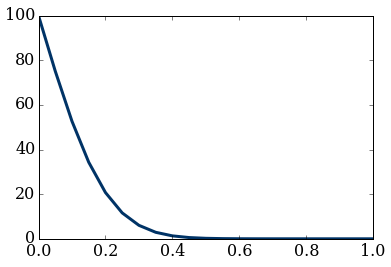

In [8]:
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

x = numpy.linspace(0,L,nx)

pyplot.plot(x, T, color='#003366', ls='-', lw=3);

Works nicely. But wait! This method has elements of explicit and implicit discretizations. Is it *conditionally stable* like forward Euler, or *unconditionally stable* like backward Euler? Try out different values of `sigma`. You'll see Crank-Nicolson is an *unconditionally stable scheme* for the diffusion equation!

## Accuracy & convergence

Using some techniques you might have learned in your PDE class, such as separation of variables, you can get a closed expression for the rod problem. It looks like this:

\begin{eqnarray}
T(x,t) = & \nonumber \\
100 - \sum_{n=1}^{\infty} & \frac{400}{(2n-1)\pi}\sin\left(\frac{(2n-1)\pi}{2L}x\right) \exp\left[-\alpha\left(\frac{(2n-1)\pi}{2L}\right)^2t\right]
\end{eqnarray}

Unfortunately, the analytical solution is a bit messy, but at least it gives a good approximation if we evaluate it for large $n$. Let's define a function that will calculate this for us:

In [9]:
from math import pi
def T_analytical(x, t, n_max, alpha, L):
    """Computes the exact solution for 1D diffusion with T=100 at x=0 and dT/dx=0 at x=L
        
    Paramters:
    ---------
    x    : array of float
        Spatial position
    t    : float
        Evaluation time
    n_max: int 
        Number of terms to evaluate expression
    alpha: float
        diffusion coefficient
    L    : float
        Size of rod
        
    Returns:
    -------
    T    : array of float
        Temperature at each location x
    """
    T = 100
    for n in range(1,n_max+1):
        k = (2*n-1)*pi/(2*L)
        
        summation = 400/((2*n-1)*pi) * numpy.sin(k*x) * numpy.exp(-alpha*k*k*t)
        T -= summation

    return T    

And let's see how that expression looks for the time where we left the numerical solution

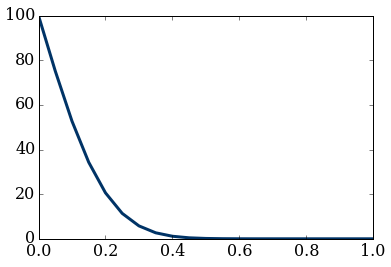

In [10]:
T_exact = T_analytical(x, dt*nt, 100, alpha, L)
pyplot.plot(x, T_exact, color='#003366', ls='-', lw=3);

In [11]:
T1 = T_analytical(x, .2, 100, alpha, L)
T2 = T_analytical(x, .2, 200, alpha, L)
numpy.sqrt(numpy.sum((T1-T2)**2)/numpy.sum(T2**2))

6.9279171182600926e-13

That looks like it should. We'll now use this result to study the convergence of the Crank-Nicolson scheme.

### Time convergence

We said this method was second-order accurate in time, remember? That's in theory, but we should test that the numerical solution indeed behaves like the theory says.

Leaving $\Delta x$ constant, we'll run the code for different values of $\Delta t$ and compare the result at the same physical time, say $t=n_t\cdot\Delta t=10$, with the analytical expression above.

The initial condition of the rod problem has a very sharp gradient: it suddendly jumps from $0{\rm C}$ to $100{\rm C}$ at the boundary. To resolve that gradient to the point that it doesn't affect time convergence, we would need a very fine mesh, and computations would be very slow. To avoid this issue, we will start from $t=1$ rather than starting from $t=0$.

First, let's define a function that will compute the $L_2$-norm of the error:

In [12]:
def L2_error(T, T_exact):
    """Computes L2 norm of error
    
    Parameters:
    ----------
    T      : array of float
        array with numerical solution
    T_exact: array of float
        array with exact solution
    Returns:
    -------
    e: L2 norm of error
    """
    e = numpy.sqrt(numpy.sum((T-T_exact)**2)/numpy.sum(T_exact)**2)
    return e

For fun, let's compare the Crank-Nicolson schem with the implicit (a.k.a., backward) Euler scheme. We'll borrow some functions from [notebook 2](http://nbviewer.ipython.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/02_Heat_Equation_1D_Implicit.ipynb) to do this.

In [13]:
def generateMatrix_btcs(N, sigma):
    """ Computes the matrix for the diffusion equation with backward Euler
        Dirichlet condition at i=0, Neumann at i=-1
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float 
        alpha*dt/dx^2
    
    Returns:
    -------
    A: 2D numpy array of float
        Matrix for diffusion equation
    """
   
    # Setup the diagonal
    d = numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    
    # Consider Neumann BC
    d[-1,-1] = 1+1./sigma
    
    # Setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A

In [14]:
def generateRHS_btcs(T, sigma):
    """ Computes right-hand side of linear system for diffusion equation
        with backward Euler
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx^2
    
    Returns:
    -------
    b: array of float
        Right-hand side of diffusion equation with backward Euler
    """
    b = numpy.zeros_like(T)
    
    b = T[1:-1]*1./sigma
    # Consider Dirichlet BC
    b[0] += T[0]
    
    return b

In [15]:
def implicit_btcs(T, A, nt, sigma):
    """ Advances diffusion equation in time with implicit central scheme
   
    Parameters:
    ----------
    T: array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps
    sigma: float
        alpha*td/dx^2
        
    Returns:
    -------
    T: array of floats
        temperature profile after nt time steps
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS_btcs(Tn, sigma)
        # Use numpy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2]

    return T

Now, let's do the runs!

In [16]:
nx = 1001
dx = L/(nx-1)

dt_values = numpy.asarray([1.0, 0.5, 0.25, 0.125])
error = numpy.zeros(len(dt_values))
error_ftcs = numpy.zeros(len(dt_values))

t_final = 10.0 
t_initial = 1.0

x = numpy.linspace(0,L,nx)

Ti =  T_analytical(x, t_initial, 100, alpha, L)
T_exact = T_analytical(x, t_final, 100, alpha, L)

for i,dt in enumerate(dt_values):
    sigma = alpha*dt/(dx*dx)

    nt = int((t_final-t_initial)/dt)
    
    A = generateMatrix(nx, sigma)
    
    A_btcs = generateMatrix_btcs(nx, sigma)

    T = Ti.copy()
    T = CrankNicolson(T, A, nt, sigma)
    
    error[i] = L2_error(T,T_exact)
    
    T = Ti.copy()
    T = implicit_btcs(T, A_btcs, nt, sigma)
    
    error_ftcs[i] = L2_error(T,T_exact)
    

And plot,

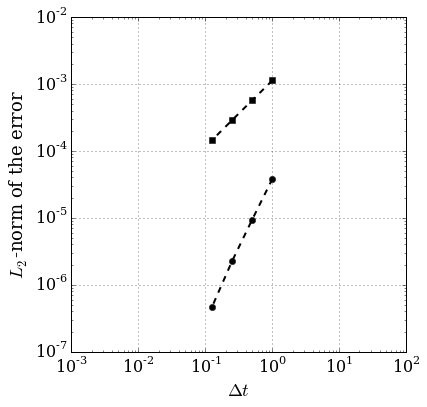

In [17]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.xlim(1e-2,1)
pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(dt_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.loglog(dt_values, error_ftcs, color='k', ls='--', lw=2, marker='s');

In [18]:
error

array([  3.81125927e-05,   9.41813943e-06,   2.25089054e-06,
         4.63970974e-07])

See how the error drops four times when the time step is halved? This method is second order in time!

Clearly, Crank-Nicolson (circles) converges faster than backward Euler (squares)! Not only that, but also the error curve is shifted down: Crank-Nicolson is more accurate.

If you look closely, you'll realize that the error in Crank-Nicolson decays about twice as fast than backward Euler: it's a second versus first order method!

### Spatial convergence

To study spatial convergence, we will run the code for meshes with 21, 41, 81 and 161 points, and compare them at the same non-dimensional time, say $t=20$. 

Let's start by defining a function that will do everything for us

In [19]:
nx_values = numpy.asarray([11, 21, 41, 81, 161])

dt = 0.1
error = numpy.zeros(len(nx_values))

t_final = 20.0 

x = numpy.linspace(0,L,nx)

for i,nx in enumerate(nx_values):
    
    dx = L/(nx-1)
    x = numpy.linspace(0,L,nx)
   
    sigma = alpha*dt/(dx*dx)

    nt = int(t_final/dt)
    
    A = generateMatrix(nx, sigma)

    T = numpy.zeros(nx)
    T[0] = 100
      
    T = CrankNicolson(T, A, nt, sigma)
    
    T_exact = T_analytical(x, t_final, 100, alpha, L)
    
    error[i] = L2_error(T,T_exact)

And plot!

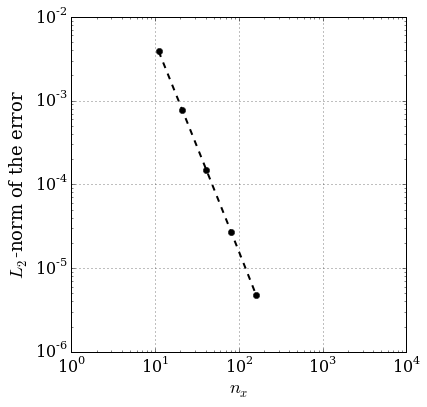

In [20]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.xlim(1e-4,1)
pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o');

That looks good! See how for each quadrant we go right, the error drops two quadrants going down (and even a bit better!).

##### Dig deeper

Let's re-do the spatial convergence, but comparing at a much later time, say $t=1000$. 

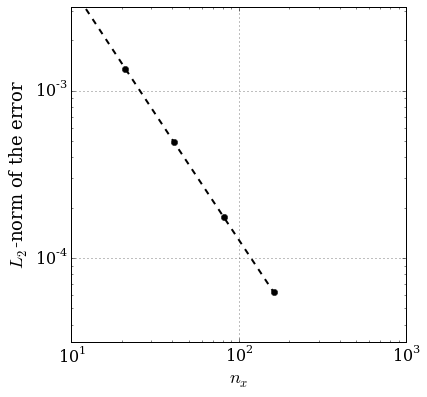

In [21]:
nx_values = numpy.asarray([11, 21, 41, 81, 161])

dt = 0.1
error = numpy.zeros(len(nx_values))

t_final = 1000.0 

x = numpy.linspace(0,L,nx)

for i,nx in enumerate(nx_values):
    
    dx = L/(nx-1)
    x = numpy.linspace(0,L,nx)
   
    sigma = alpha*dt/(dx*dx)

    nt = int(t_final/dt)
    
    A = generateMatrix(nx, sigma)

    T = numpy.zeros(nx)
    T[0] = 100
      
    T = CrankNicolson(T, A, nt, sigma)
    
    T_exact = T_analytical(x, t_final, 100, alpha, L)
    
    error[i] = L2_error(T,T_exact)

pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
#pyplot.xlim(1e-4,1)
#pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o');

In [22]:
error

array([  3.59569224e-03,   1.34923182e-03,   4.90905474e-04,
         1.76021088e-04,   6.26681531e-05])

Wait, convergence is not that great now! It's not as good as second order, but not as bad as first order. *What is going on?*

Remember our implementation of the boundary conditions? We used

\begin{equation}\frac{T^{n}_{N-1} - T^{n}_{N-2}}{\Delta x} = q.\end{equation}

Well, that is a **first-order** approximation! 

But, why doesn't this affect our solution at an earlier time? Initially, temperature on the right side of the rod is zero and the gradient is very small in that region; at that point in time, errors there were negligible. Once temperature starts picking up, we start having problems.

**Boundary conditions can affect the convergence and accuracy of your solution!**

---
###### The cell below loads the style of the notebook

In [23]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())